In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore')

<font size=3>
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or
incorrect imputation. (5 marks)</font>

In [2]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
bank_data.head(30)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
bank_data.isnull().values.any()

False

<font size=4>2. EDA: Study the data distribution in each attribute and target variable, share your findings</font>
(20 marks)
* 1 -  Number of unique in each column?
* 2 - Number of people with zero mortgage?
* 3 - Number of people with zero credit card spending per month?
* 4 - Value counts of all categorical columns.
* 5 - Univariate and Bivariate
* 6 - Get data model ready

In [7]:
#1
#Before this step, I tought required to normalize the ZIP Code to macro zones instead of keeping the street information
bank_data['ZIP Code'] = bank_data['ZIP Code'].astype(str).str[:-2] + '00'
bank_data['ZIP Code'] = bank_data['ZIP Code'].astype('category')

for column in bank_data:
    print('Unique values for ' + column + ':')
    print(bank_data[column].nunique())
    print('')

Unique values for ID:
5000

Unique values for Age:
45

Unique values for Experience:
47

Unique values for Income:
162

Unique values for ZIP Code:
58

Unique values for Family:
4

Unique values for CCAvg:
108

Unique values for Education:
3

Unique values for Mortgage:
347

Unique values for Personal Loan:
2

Unique values for Securities Account:
2

Unique values for CD Account:
2

Unique values for Online:
2

Unique values for CreditCard:
2



In [8]:
#2
monrtgage_zero = bank_data.loc[bank_data['Mortgage'] == 0].index.size
print('Number of people with zero mortgage: ' + str(monrtgage_zero))
#3
monrtgage_zero = bank_data.loc[bank_data['CCAvg'] <= 0].index.size
print('Number of people with zero CC average: ' + str(monrtgage_zero))

Number of people with zero mortgage: 3462
Number of people with zero CC average: 106


In [9]:
#4
categorical_columns = ['ZIP Code','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
for column in categorical_columns:
    print(column + ' value count: ' + str(bank_data[column].nunique()))

ZIP Code value count: 58
Education value count: 3
Personal Loan value count: 2
Securities Account value count: 2
CD Account value count: 2
Online value count: 2
CreditCard value count: 2


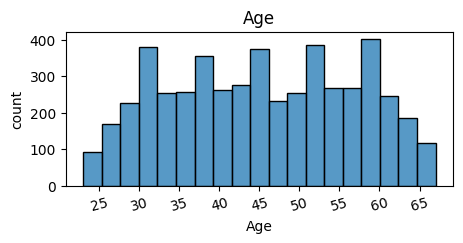

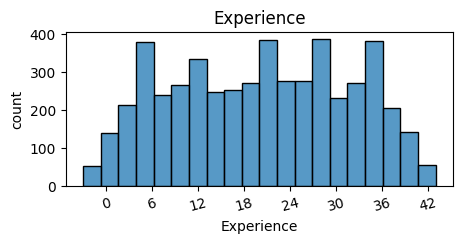

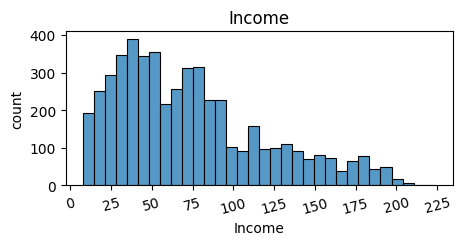

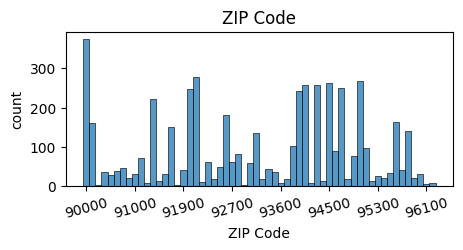

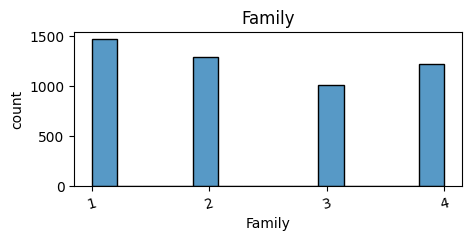

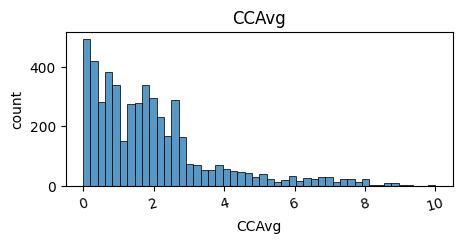

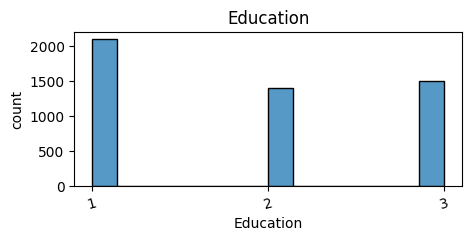

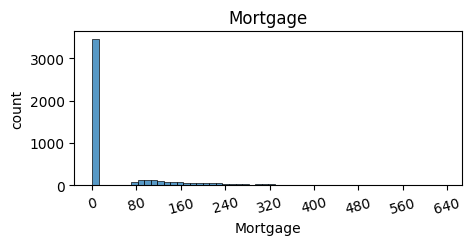

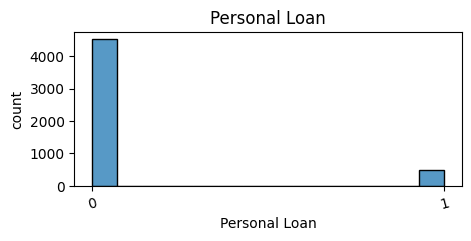

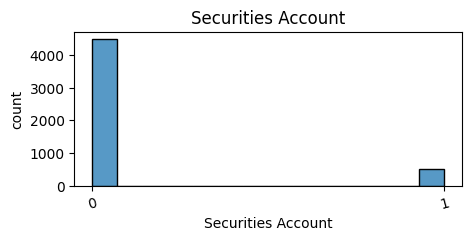

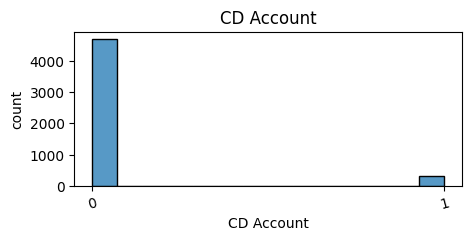

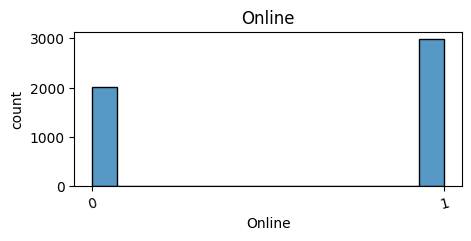

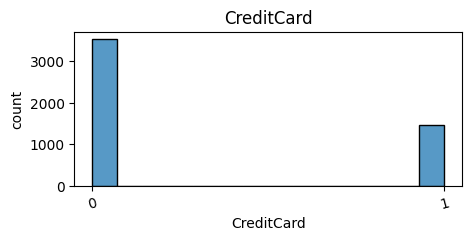

In [10]:
#5 (partial)
plt.rcParams["figure.figsize"] = (5,2)

for column in bank_data.drop('ID', axis=1):
    plt.title(column)
    sns.histplot(x=column, data=bank_data)
    plt.ylabel('count')
    plt.xticks(rotation=15)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
    plt.show()
    
plt.rcdefaults()

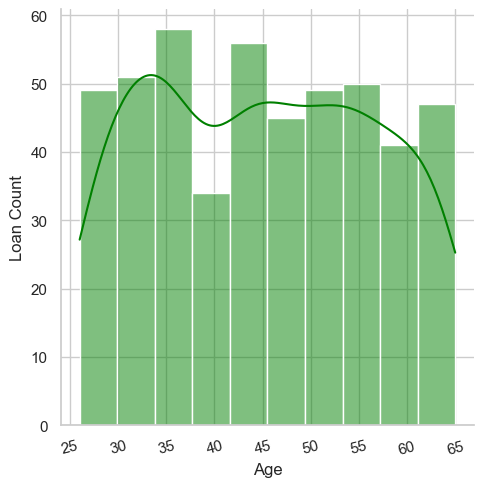

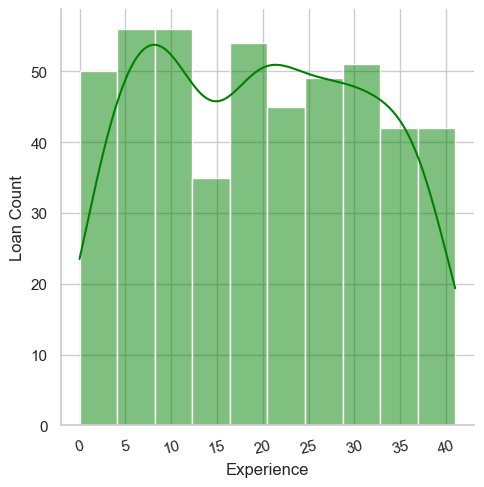

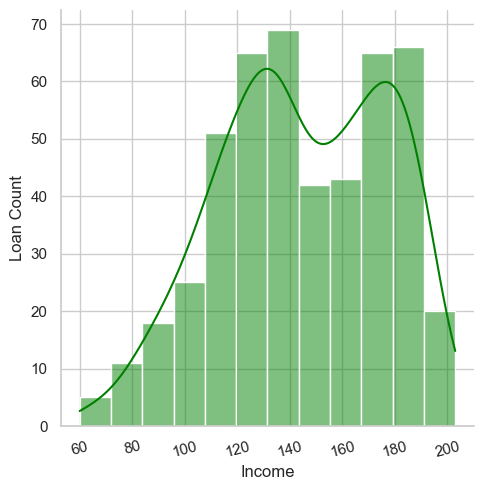

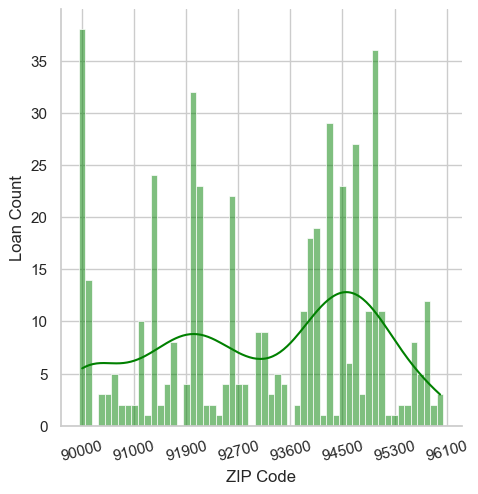

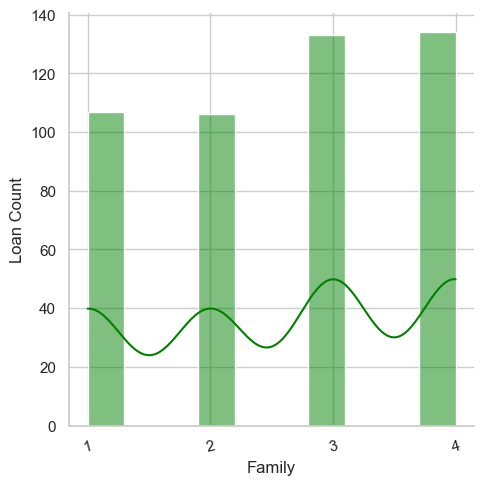

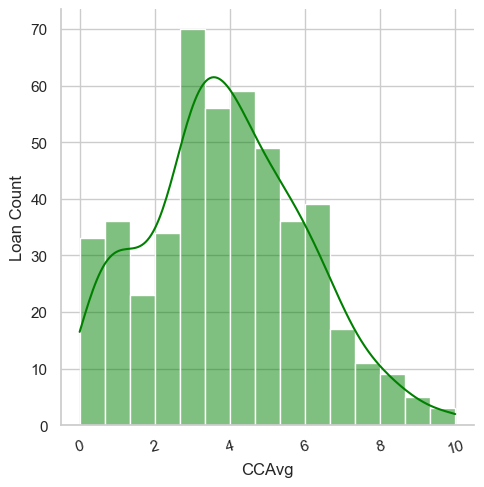

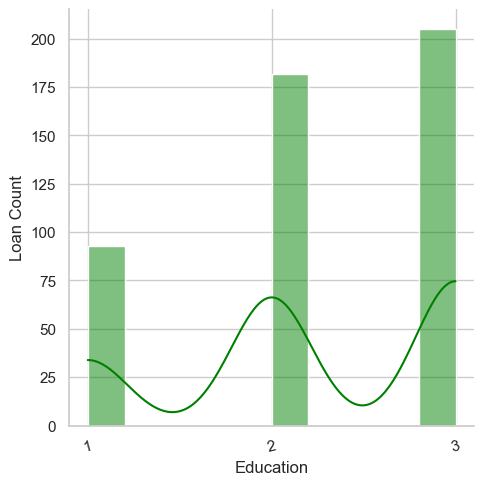

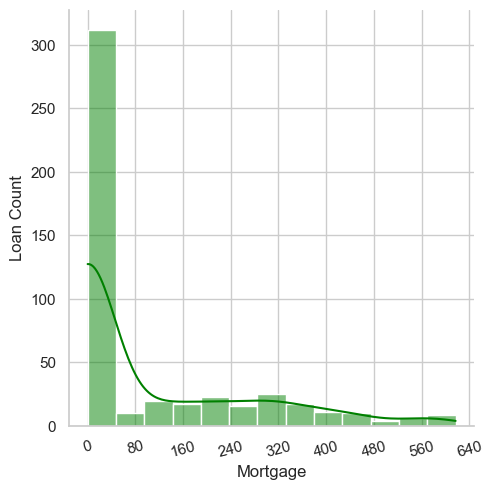

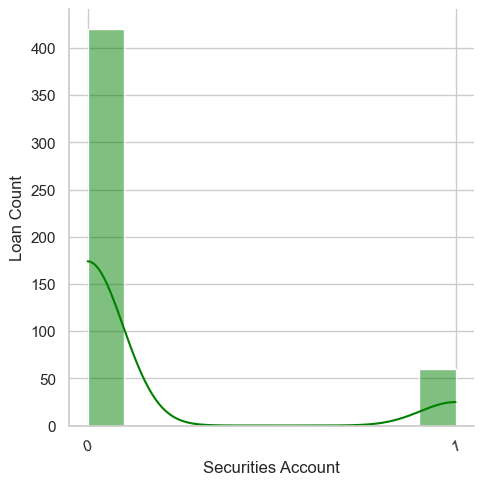

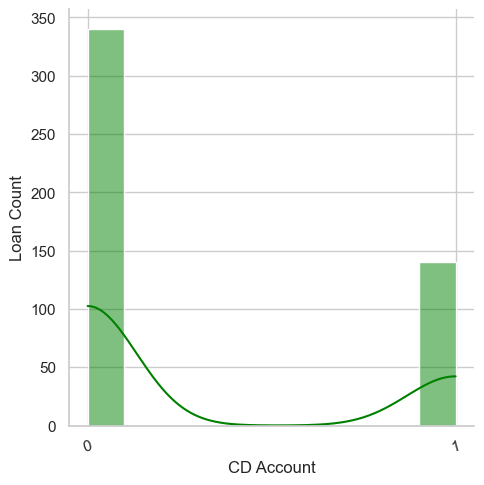

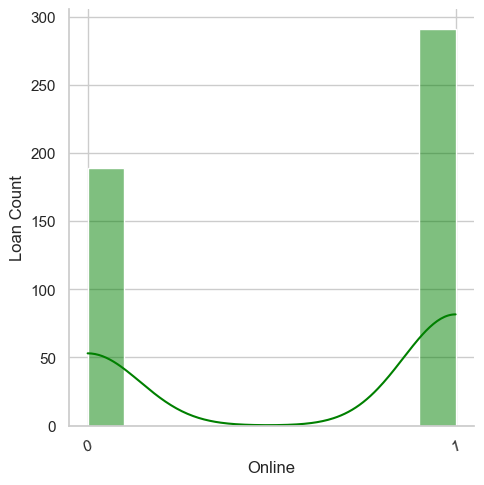

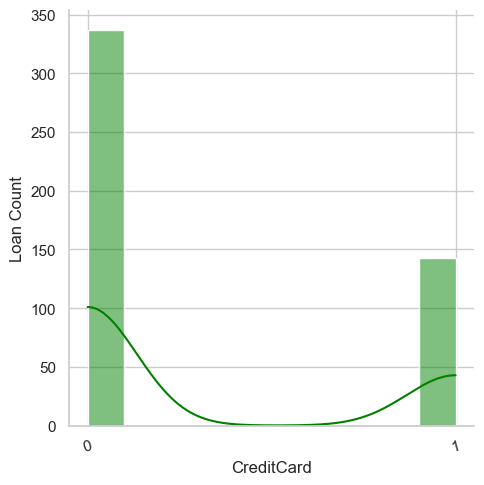

In [11]:
#5 (partial)
plt.rcParams["figure.figsize"] = (5,2)
for column in bank_data.drop(['ID',"Personal Loan"], axis=1):
    columnData = pd.DataFrame(bank_data, columns=[column,"Personal Loan"])
    
    sns.set(style="whitegrid")
    tips = sns.load_dataset("tips")
    ax = sns.displot(columnData.loc[columnData["Personal Loan"]==1][column], color='green', kde=True)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
    plt.xticks(rotation=15)
    plt.ylabel('Loan Count')
    plt.show()
    
plt.rcdefaults()

<font size=4>3. Split the data into training and test set in the ratio of 70:30 respectively </font>

In [12]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
bank_dataIL = bank_data.drop(['ID', 'ZIP Code'], axis=1)
x = bank_dataIL.drop("Personal Loan",axis=1)
y = bank_dataIL["Personal Loan"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [14]:
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


<font size=4>4. Use Logistic Regression model to predict whether the customer will take personal loan or
not. Print all the metrics related for evaluating the model performance (15 marks)</font>

In [16]:
# Model before tunning

pred_train = model.predict(x_train)

print('Accurace')
print(str(metrics.accuracy_score(y_train, pred_train)))
print()
print('Recall')
print(str(metrics.recall_score(y_train, pred_train)))
print()

avg_p = metrics.precision_score(y_train, pred_train)
print('Precision')
print(str(avg_p))
print()

model_score = model.score(x_train, y_train)
print('Train score')
print(model_score)
print()
model_score = model.score(x_test, y_test)
print('Test score')
print(model_score)

Accurace
0.9517142857142857

Recall
0.6037151702786377

Precision
0.826271186440678

Train score
0.9517142857142857

Test score
0.9493333333333334


In [17]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

lm= sm.OLS(y_train,X2).fit()

print("Pvalues for each column:")
print()
print(lm.pvalues)
print()
print(lm.summary())

Pvalues for each column:

const                  1.416951e-02
Age                    3.583212e-02
Experience             2.196382e-02
Income                3.919147e-131
Family                 1.729709e-21
CCAvg                  7.831961e-05
Education              1.096590e-55
Mortgage               3.726815e-02
Securities Account     2.584943e-06
CD Account             3.602137e-61
Online                 3.033725e-03
CreditCard             1.265548e-07
dtype: float64

                            OLS Regression Results                            
Dep. Variable:          Personal Loan   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:46:05   Log-Likelihood:                 193.57
No. Observations:                3500   AIC:        

   Predict 1  Predict 0
1        195        128
0         41       3136


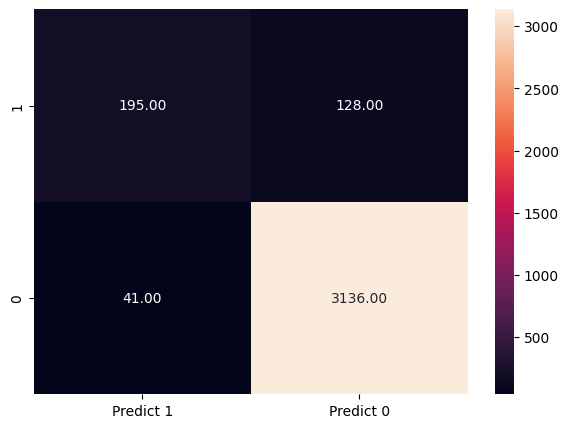

In [18]:
cm=metrics.confusion_matrix(y_train, pred_train, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt=".2f")

print(df_cm)

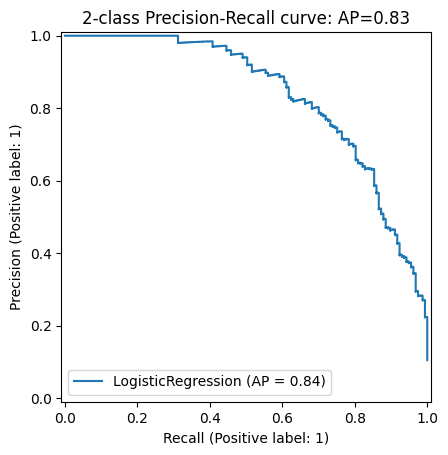

In [19]:
disp = PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(avg_p))
print(disp)

<font size=4>5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter
</font>

In [20]:
#make prediction
pred=model.predict(x_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print()
print("RMSE:", mean_squared_error(y_test, pred)**0.5)
print()
print("R2 Squarred:", r2_score(y_test, pred))

print()

coef_table = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_.flatten()
})

print(coef_table)

Mean Absolute Error: 0.050666666666666665

RMSE: 0.2250925735484551

R2 Squarred: 0.4593338423815869

               Feature  Coefficient
0                  Age    -0.394786
1           Experience     0.400563
2               Income     0.048595
3               Family     0.625641
4                CCAvg     0.106536
5            Education     1.575083
6             Mortgage     0.000778
7   Securities Account    -0.744581
8           CD Account     3.097224
9               Online    -0.509120
10          CreditCard    -1.021353


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'l3'],
    'C': [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

modelO = grid_search.best_estimator_
modelO.fit(x_train, y_train, 3)

pred_train = modelO.predict(x_train)

print('Accurace')
print(str(metrics.accuracy_score(y_train, pred_train)))
print()
print('Recall')
print(str(metrics.recall_score(y_train, pred_train)))
print()

avg_p = metrics.precision_score(y_train, pred_train)
print('Precision')
print(str(avg_p))
print()

model_score = modelO.score(x_train, y_train)
print('Train score')
print(model_score)
print()
model_score = modelO.score(x_test, y_test)
print('Test score')
print(model_score)

coef_table = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': modelO.coef_.flatten()
})

print(coef_table)

#This are the past values, looks like they all dropped a little

# Accurace
# 0.9517142857142857

# Recall
# 0.6037151702786377

# Precision
# 0.826271186440678

# Train score
# 0.9517142857142857

# Test score
# 0.9493333333333334

Best Parameters:  {'C': 4, 'penalty': 'l1'}
Accurace
0.952

Recall
0.641399416909621

Precision
0.8301886792452831

Train score
0.952

Test score
0.9566666666666667
               Feature  Coefficient
0                  Age    -0.398109
1           Experience     0.598503
2               Income     2.483773
3               Family     0.741007
4                CCAvg     0.232606
5            Education     1.447165
6             Mortgage     0.001337
7   Securities Account    -0.233899
8           CD Account     0.890160
9               Online    -0.353425
10          CreditCard    -0.603620


<font size=4>6. Give Business understanding of your model? (5 marks)</font>

In [22]:
TP = df_cm['Predict 1'][0]
FN = df_cm['Predict 0'][0]
FP = df_cm['Predict 1'][1]
TN = df_cm['Predict 0'][1]

tot = TP+FN+FP+TN
pP = (TP/tot)*100
pN = (TN/tot)*100

print('From what my model says:')
print('{:.2f}% of the people in the data can be interested in a loan'.format(pP))

From what my model says:
5.57% of the people in the data can be interested in a loan
